# Imports

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
from time import time
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imb_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# Data Preparation & Preprocessing

In [4]:
rs = 0
traindata = pd.read_csv(f'traindata.csv')
traindata = traindata.set_axis(["Unnamed", "ID", "Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "SimillarHTTP", "Inbound", "Label"], axis=1)
traindata = traindata.loc[:, ~traindata.columns.str.contains('^Unnamed')] # Remove Unnamed column(s)
traindata.head()

,ID,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,687,172.16.0.5-192.168.50.1-26580-22-6,172.16.0.5,26580,192.168.50.1,22,6,2018-12-01 09:22:09.400341,11435366,29,38,3294.0,6074.0,648.0,0.0,113.586207,171.646755,976.0,0.0,159.842105,322.844162,819.212957,5.859017,173263.121212,450882.700010,2266529.0,0.0,11435366.0,408405.928571,770724.945875,2674492.0,1.0,11027540.0,298041.621622,571938.15101,2266529.0,1.0,0,0,0,0,944,1256,2.535992,3.323024,0.0,976.0,137.764706,265.86542,70684.421422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,139.820896,113.586207,159.842105,944.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,3294.0,38.0,6074.0,29200.0,247.0,22.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
1,638,192.168.50.7-52.114.77.33-50657-443-6,192.168.50.7,50657,52.114.77.33,443,6,2018-12-01 09:22:09.722697,102387,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19.533730,102387.000000,0.000000,102387.0,102387.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0,0,0,20,20,9.766865,9.766865,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,257.0,1021.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
2,9352,192.168.50.7-52.114.77.33-50657-443-6,52.114.77.33,443,192.168.50.7,50657,6,2018-12-01 09:22:09.825086,116,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,25862.068966,58.000000,79.195959,114.0,2.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.000000,0.00000,2.0,2.0,0,0,0,0,20,40,8620.689655,17241.379310,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1021.0,257.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
3,640,192.168.50.7-74.208.236.171-50572-80-6,74.208.236.171,80,192.168.50.7,50572,6,2018-12-01 09:22:11.029229,141,1,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,28368.794326,47.000000,78.822586,138.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,1.500000,2.12132,3.0,0.0,0,0,0,0,20,60,7092.198582,21276.595745,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1959.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
4,7435,192.168.50.7-74.208.236.171-50572-80-6,192.168.50.7,50572,74.208.236.171,80,6,2018-12-01 09:22:11.029380,54918,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.626898,27459.000000,38828.647569,54915.0,3.0,0.0,0.000000,0.000000,0.0,0.0,3.0,3.000000,0.00000,3.0,3.0,0,0,0,0,20,40,18.208966,36.417932,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.

In [5]:
testdata = pd.read_csv(f'testdata.csv')
testdata = testdata.set_axis(["Unnamed", "ID", "Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "SimillarHTTP", "Inbound"], axis=1)
testdata = testdata.loc[:, ~testdata.columns.str.contains('^Unnamed')] # Remove Unnamed column(s)
testdata.head()

,ID,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound
0,454136,172.16.0.5-192.168.50.4-5967-5967-6,172.16.0.5,5967,192.168.50.4,5967,6,2018-11-03 11:36:30.225322,38928087,8,2,48.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.541304,0.256884,4.325343e+06,6.594416e+06,15371769.0,0.0,38928087.0,5.561155e+06,7.068528e+06,15371769.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,160,40,0.205507,0.051377,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,6.600000,6.0,6.0,160,0,0,0,0,0,0,8,48,2,12,5840,0,7,20,64.500000,89.802561,128.0,1.0,1.297599e+07,2.360014e+06,15371769.0,10653446.0,0,1
1,334585,172.16.0.5-192.168.50.4-48161-46578-6,172.16.0.5,48161,192.168.50.4,46578,6,2018-11-03 11:36:30.225525,105,2,2,12.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,228571.428571,38095.238095,3.500000e+01,5.802586e+01,102.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,2.0,2.0,0.000000e+00,2.0,2.0,0,0,0,0,40,40,19047.619048,19047.619048,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,7.500000,6.0,6.0,40,0,0,0,0,0,0,2,12,2,12,5840,0,1,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
2,246617,172.16.0.5-192.168.50.4-22804-22804-6,172.16.0.5,22804,192.168.50.4,22804,6,2018-11-03 11:36:30.225526,24368284,8,6,48.0,36.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.447104,0.574517,1.874483e+06,3.748817e+06,10832964.0,1.0,24368284.0,3.481183e+06,4.645704e+06,10833068.0,1.0,15962113.0,3192422.6,4.814161e+06,10833066.0,1.0,0,0,0,0,160,120,0.328296,0.246222,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,6.428571,6.0,6.0,160,0,0,0,0,0,0,8,48,6,36,5840,0,7,20,90.000000,25.119713,105.0,61.0,8.122671e+06,2.862532e+06,10832964.0,5128982.0,0,1
3,43667,172.16.0.5-192.168.50.4-48162-43438-6,172.16.0.5,48162,192.168.50.4,43438,6,2018-11-03 11:36:30.225576,104,2,2,12.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,230769.230769,38461.538462,3.466667e+01,5.831238e+01,102.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0,0,0,0,40,40,19230.769231,19230.769231,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,7.500000,6.0,6.0,40,0,0,0,0,0,0,2,12,2,12,5840,0,1,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
4,84587,172.16.0.5-192.168.50.4-61803-61803-6,172.16.0.5,61803,192.168.50.4,61803,6,2018-11-03 11:36:30.225633,42848358,8,2,48.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.400287,0.233381,4.760929e+06,7.153841e+06,14853735.0,1.0,42848245.0,6.121178e+06,7.650009e+06,14853735.0,1.0,2.0,2.0,0.000000e+00,2.0,2.0,0,0,0,0,160,40,0.186705,0.046676,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,6.600000,6.0,6.0,160,0,0,0,0,0,0,8,48,2,12,5840,0,7,20,30.333333,25.403412,45.0,1.0,1.428272e+07,8.454236e+05,14853735.0,13311501.0,0,1


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136411 entries, 0 to 136410
Data columns (total 88 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           136411 non-null  int64  
 1   Flow ID                      136411 non-null  object 
 2   Source IP                    136411 non-null  object 
 3   Source Port                  136411 non-null  int64  
 4   Destination IP               136411 non-null  object 
 5   Destination Port             136411 non-null  int64  
 6   Protocol                     136411 non-null  int64  
 7   Timestamp                    136411 non-null  object 
 8   Flow Duration                136411 non-null  int64  
 9   Total Fwd Packets            136411 non-null  int64  
 10  Total Backward Packets       136411 non-null  int64  
 11  Total Length of Fwd Packets  136411 non-null  float64
 12  Total Length of Bwd Packets  136411 non-null  float64
 13 

In [7]:
# Drop unnecessary object features
traindata = traindata.select_dtypes(exclude=['object'])
testdata = testdata.select_dtypes(exclude=['object'])

In [8]:
traindata.head()

,ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,687,26580,22,6,11435366,29,38,3294.0,6074.0,648.0,0.0,113.586207,171.646755,976.0,0.0,159.842105,322.844162,819.212957,5.859017,173263.121212,450882.700010,2266529.0,0.0,11435366.0,408405.928571,770724.945875,2674492.0,1.0,11027540.0,298041.621622,571938.15101,2266529.0,1.0,0,0,0,0,944,1256,2.535992,3.323024,0.0,976.0,137.764706,265.86542,70684.421422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,139.820896,113.586207,159.842105,944.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,3294.0,38.0,6074.0,29200.0,247.0,22.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,638,50657,443,6,102387,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19.533730,102387.000000,0.000000,102387.0,102387.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0,0,0,20,20,9.766865,9.766865,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,257.0,1021.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,9352,443,50657,6,116,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,25862.068966,58.000000,79.195959,114.0,2.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.000000,0.00000,2.0,2.0,0,0,0,0,20,40,8620.689655,17241.379310,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1021.0,257.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,640,80,50572,6,141,1,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,28368.794326,47.000000,78.822586,138.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,1.500000,2.12132,3.0,0.0,0,0,0,0,20,60,7092.198582,21276.595745,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1959.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,7435,50572,80,6,54918,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.626898,27459.000000,38828.647569,54915.0,3.0,0.0,0.000000,0.000000,0.0,0.0,3.0,3.000000,0.00000,3.0,3.0,0,0,0,0,20,40,18.208966,36.417932,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,256.0,1959.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
traindata.describe()

,ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
count,136411.000000,136411.000000,136411.000000,136411.000000,1.364110e+05,136411.000000,136411.000000,136411.000000,1.364110e+05,136411.000000,136411.000000,136411.000000,136411.000000,136411.000000,136411.000000,136411.000000,136411.000000,1.332410e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,1.364110e+05,136411.000000,136411.000000,136411.0,136411.0,136411.0,1.364110e+05,1.364110e+05,1.364100e+05,1.364100e+05,136410.000000,136410.000000,136410.000000,136410.000000,1.364100e+05,136410.0,136410.000000,136410.000000,136410.0,136410.000000,136410.000000,136410.000000,136410.0,136410.000000,136410.000000,136410.000000,136410.000000,1.364100e+05,136410.0,136410.0,136410.0,136410.0,136410.0,136410.0,136410.000000,136410.000000,136410.000000,1.364100e+05,136410.000000,136410.000000,136410.000000,1.364100e+05,1.364100e+05,1.364100e+05,1.364100e+05,1.364100e+05,1.364100e+05,1.364100e+05,1.364100e+05,1.364100e+05,136410.000000,136411.000000
mean,117422.829720,28554.573597,30756.944059,13.805082,5.813582e+06,3.896878,0.907134,1415.243477,8.806463e+02,525.013555,504.428287,510.565063,8.133903,38.291978,3.378840,11.115290,10.445512,inf,inf,4.182105e+05,6.398351e+05,1.839343e+06,4.961386e+03,5.775534e+06,4.682012e+05,6.757800e+05,1.816605e+06,4.732634e+03,1.174917e+06,1.448144e+05,2.809486e+05,6.794866e+05,0.367874,0.009772,0.0,0.0,0.0,-5.899002e+07,-9.346615e+04,1.041514e+06,1.079123e+03,504.335078,550.570295,513.795867,13.802881,8.410610e+03,0.0,0.000242,0.009772,0.0,0.243069,0.045803,0.032630,0.0,0.125658,755.207863,510.558015,11.115371,-5.899045e+07,0.0,0.0,0.0,0.0,0.0,0.0,3.896892,1415.232270,0.907140,8.806528e+02,2348.669320,392.565069,1.780273,-2.824876e+07,8.779855e+03,4.945088e+03,1.637061e+04,6.001754e+03,1.285436e+06,3.073262e+05,1.750528e+06,9.767415e+05,0.925915,0.082449
std,144046.124452,24291.368435,20313.710283,5.003846,2.387367e+07,10.842116,15.676989,3871.117153,5.198717e+04,555.238541,555.265169,552.330640,41.254196,492.868395,22.181092,90.120009,102.126332,NaN,NaN,1.685981e+06,2.445520e+06,7.497755e+06,3.592627e+05,2.387191e+07,1.854955e+06,2.621932e+06,7.492611e+06,3.595775e+05,1.020554e+07,1.547185e+06,2.787349e+06,6.150906e+06,2.990057,0.098369,0.0,0.0,0.0,6.894624e+08,1.409585e+07,9.074378e+05,2.310741e+04,555.254625,715.676607,551.968933,90.665049,2.580308e+05,0.0,0.015552,0.098370,0.0,0.428938,0.209059,0.177666,0.0,0.469691,831.958095,552.326530,90.120335,6.894650e+08,0.0,0.0,0.0,0.0,0.0,0.0,10.842155,3871.129129,15.677046,5.198736e+04,7589.604414,3797.785917,8.542628,1.

In [10]:
# Check NaN values
for column in list(traindata.columns[traindata.isna().any()].tolist()):
    print('{}: {}'.format(column, traindata[column].isnull().sum()))

Flow Bytes/s: 3170
Fwd Packets/s: 1
Bwd Packets/s: 1
Min Packet Length: 1
Max Packet Length: 1
Packet Length Mean: 1
Packet Length Std: 1
Packet Length Variance: 1
FIN Flag Count: 1
SYN Flag Count: 1
RST Flag Count: 1
PSH Flag Count: 1
ACK Flag Count: 1
URG Flag Count: 1
CWE Flag Count: 1
ECE Flag Count: 1
Down/Up Ratio: 1
Average Packet Size: 1
Avg Fwd Segment Size: 1
Avg Bwd Segment Size: 1
Fwd Header Length.1: 1
Fwd Avg Bytes/Bulk: 1
Fwd Avg Packets/Bulk: 1
Fwd Avg Bulk Rate: 1
Bwd Avg Bytes Bulk: 1
Bwd Avg Packets/Bulk: 1
Bwd Avg Bulk Rate: 1
Subflow Fwd Packets: 1
Subflow Fwd Bytes: 1
Subflow Bwd Packets: 1
Subflow Bwd Bytes: 1
Init Win_bytes_forward: 1
Init_Win_bytes_backward: 1
act_data_pkt_fwd: 1
min_seg_size_forward: 1
Active Mean: 1
Active Std: 1
Active Max: 1
Active Min: 1
Idle Mean: 1
Idle Std: 1
Idle Max: 1
Idle Min: 1
Inbound: 1


In [11]:
# Check NaN values
for column in list(testdata.columns[testdata.isna().any()].tolist()):
    print('{}: {}'.format(column, testdata[column].isnull().sum()))

Flow Bytes/s: 1


In [12]:
# Replace Flow Bytes/s NaN values with mean
traindata['Flow Bytes/s'].fillna((traindata['Flow Bytes/s'].mean()), inplace=True)

In [13]:
# Replace Flow Bytes/s NaN values with mean
testdata['Flow Bytes/s'].fillna((testdata['Flow Bytes/s'].mean()), inplace=True)

In [14]:
traindata[traindata['Inbound'].isna()]

,ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
121410,5345,900,22425,17,224,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.314286e+07,8928.571429,224.0,0.0,224.0,224.0,224.0,224.0,0.0,224.0,224.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
# Check the count of features containing NaN
print(traindata.isna().sum().sum())
print(traindata[traindata['Inbound'].isna()].isna().sum().sum())

43
43


In [16]:
# Only one record conaining NaN, replace it by the mean
traindata = traindata.fillna(traindata.mean())

In [17]:
# Check that there is no NaN anymore
for column in list(traindata.columns[traindata.isna().any()].tolist()):
    print('{}: {}'.format(column, traindata[column].isnull().sum()))

In [18]:
# Check that there is no NaN anymore
for column in list(testdata.columns[testdata.isna().any()].tolist()):
    print('{}: {}'.format(column, testdata[column].isnull().sum()))

In [19]:
# Check null values
for column in list(traindata.columns[traindata.isnull().any()].tolist()):
    print('{}: {}'.format(column, traindata[column].isnull().sum()))

In [20]:
# Check null values
for column in list(testdata.columns[testdata.isnull().any()].tolist()):
    print('{}: {}'.format(column, testdata[column].isnull().sum()))

In [21]:
# Drop unnecessary features
traindata = traindata.drop(columns=['ID'])
testdata = testdata.drop(columns=['ID'])

In [22]:
traindata.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,26580,22,6,11435366,29,38,3294.0,6074.0,648.0,0.0,113.586207,171.646755,976.0,0.0,159.842105,322.844162,819.212957,5.859017,173263.121212,450882.700010,2266529.0,0.0,11435366.0,408405.928571,770724.945875,2674492.0,1.0,11027540.0,298041.621622,571938.15101,2266529.0,1.0,0,0,0,0,944,1256,2.535992,3.323024,0.0,976.0,137.764706,265.86542,70684.421422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,139.820896,113.586207,159.842105,944.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,3294.0,38.0,6074.0,29200.0,247.0,22.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,50657,443,6,102387,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19.533730,102387.000000,0.000000,102387.0,102387.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0,0,0,20,20,9.766865,9.766865,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,257.0,1021.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,443,50657,6,116,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,25862.068966,58.000000,79.195959,114.0,2.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.000000,0.00000,2.0,2.0,0,0,0,0,20,40,8620.689655,17241.379310,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1021.0,257.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,80,50572,6,141,1,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,28368.794326,47.000000,78.822586,138.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,1.500000,2.12132,3.0,0.0,0,0,0,0,20,60,7092.198582,21276.595745,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1959.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,50572,80,6,54918,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.626898,27459.000000,38828.647569,54915.0,3.0,0.0,0.000000,0.000000,0.0,0.0,3.0,3.000000,0.00000,3.0,3.0,0,0,0,0,20,40,18.208966,36.417932,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,256.0,1959.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
traindata.isin([np.nan]).sum().sum()

0

In [24]:
testdata.isin([np.nan]).sum().sum()

0

In [25]:
# Check infinity values
for column in list(traindata.columns[traindata.isin([np.inf, -np.inf]).any()].tolist()):
    print('{}: {}'.format(column, traindata[column].isin([np.inf, -np.inf]).sum()))

Flow Bytes/s: 4905
Flow Packets/s: 4905


In [26]:
# Check infinity values
for column in list(testdata.columns[testdata.isin([np.inf, -np.inf]).any()].tolist()):
    print('{}: {}'.format(column, testdata[column].isin([np.inf, -np.inf]).sum()))

Flow Bytes/s: 3912
Flow Packets/s: 3912


In [27]:
# Replace infinity values by the mean
traindata.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace by NaN
traindata = traindata.fillna(traindata.mean()) # Replace NaN by mean

In [28]:
# Replace infinity values by the mean
testdata.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace by NaN
testdata = testdata.fillna(testdata.mean()) # Replace NaN by mean

In [29]:
# Check no infinity values anymore
for column in list(traindata.columns[traindata.isin([np.inf, -np.inf]).any()].tolist()):
    print('{}: {}'.format(column, traindata[column].isin([np.inf, -np.inf]).sum()))

In [30]:
# Check no infinity values anymore
for column in list(testdata.columns[testdata.isin([np.inf, -np.inf]).any()].tolist()):
    print('{}: {}'.format(column, testdata[column].isin([np.inf, -np.inf]).sum()))

In [31]:
# Train test split
trX, teX, trY, teY = train_test_split(traindata.loc[:, traindata.columns != 'Label'], traindata.loc[:, traindata.columns == 'Label'], test_size=0.2, random_state=rs)

# Training

## Models - Baseline
- KNN
- LogisticRegression
- SVM
- DecisionTreeClassifier
- AdaBoostClassifier
- xgboost

  0%|          | 0/6 [00:00<?, ?it/s]

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       0.98      0.98      0.98      2274

    accuracy                           1.00     27283
   macro avg       0.99      0.99      0.99     27283
weighted avg       1.00      1.00      1.00     27283



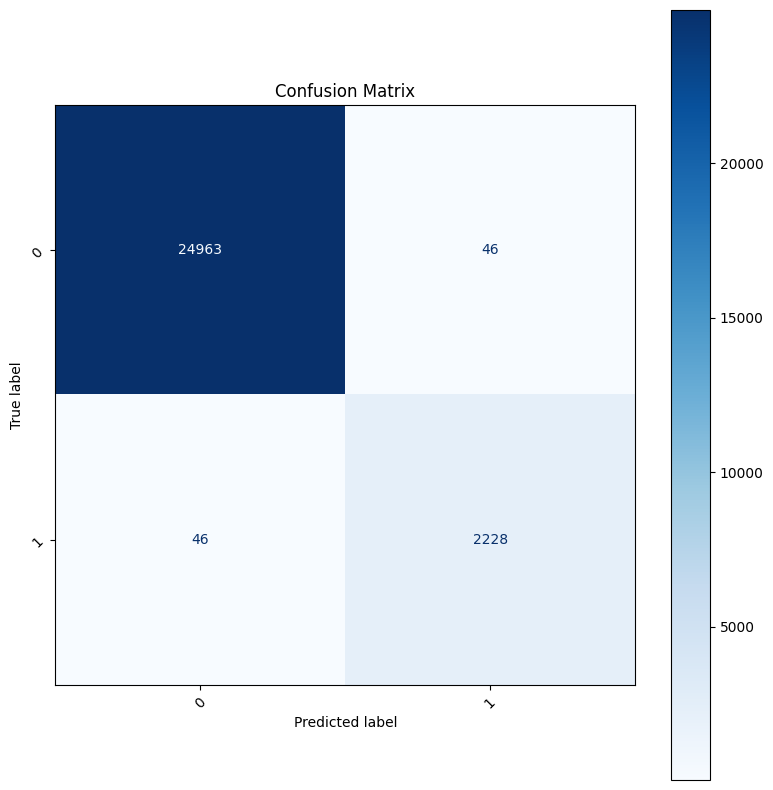

 17%|█▋        | 1/6 [00:07<00:38,  7.70s/it]

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     25009
           1       0.84      0.20      0.32      2274

    accuracy                           0.93     27283
   macro avg       0.89      0.60      0.64     27283
weighted avg       0.92      0.93      0.91     27283



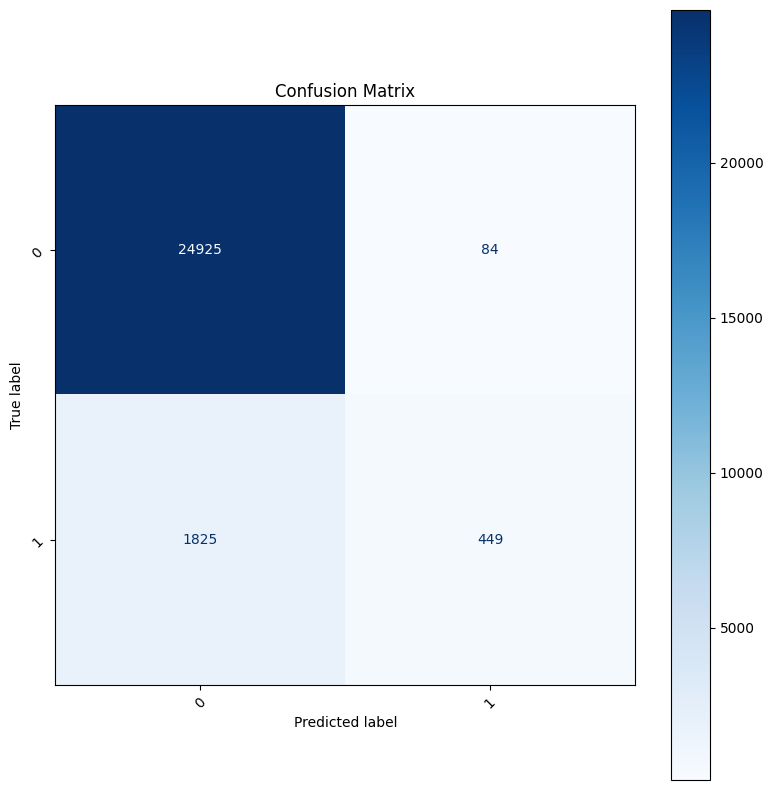

 33%|███▎      | 2/6 [00:12<00:24,  6.06s/it]

SVC
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25009
           1       0.99      0.08      0.15      2274

    accuracy                           0.92     27283
   macro avg       0.96      0.54      0.56     27283
weighted avg       0.93      0.92      0.89     27283



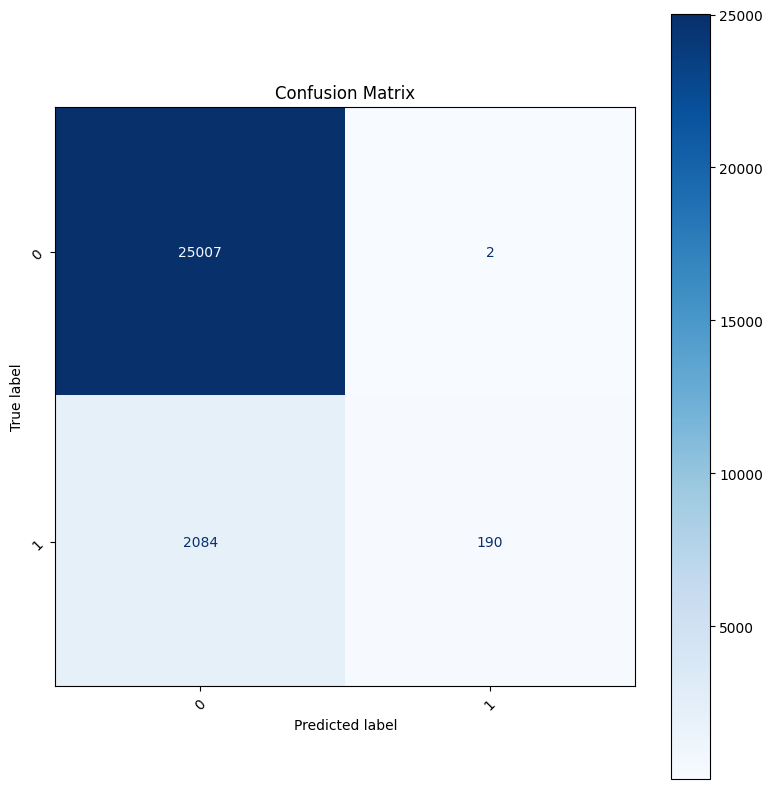

 50%|█████     | 3/6 [06:04<08:12, 164.07s/it]

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       1.00      1.00      1.00      2274

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



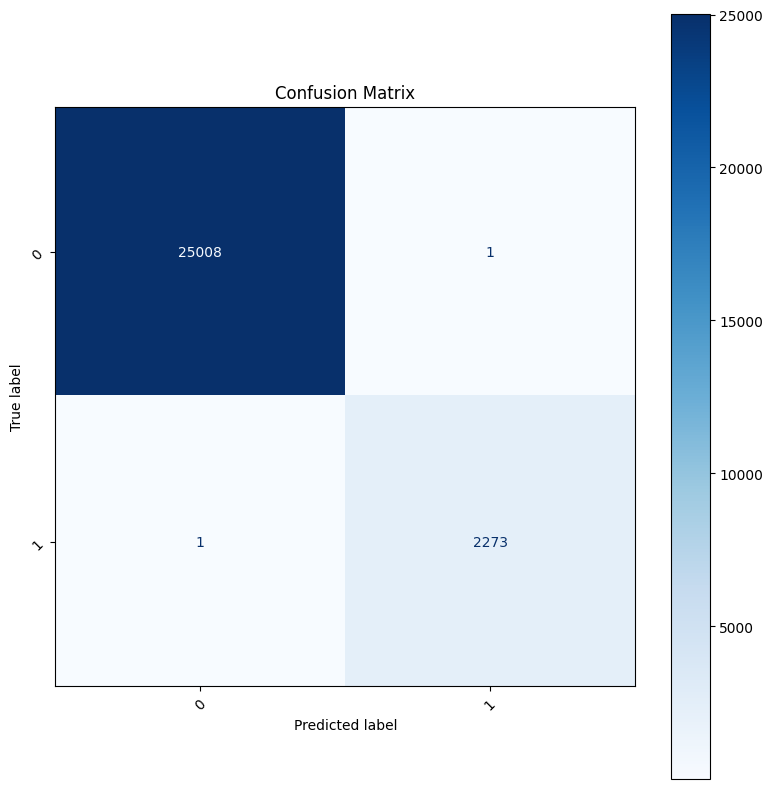

 67%|██████▋   | 4/6 [06:05<03:19, 99.52s/it] 

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       1.00      1.00      1.00      2274

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



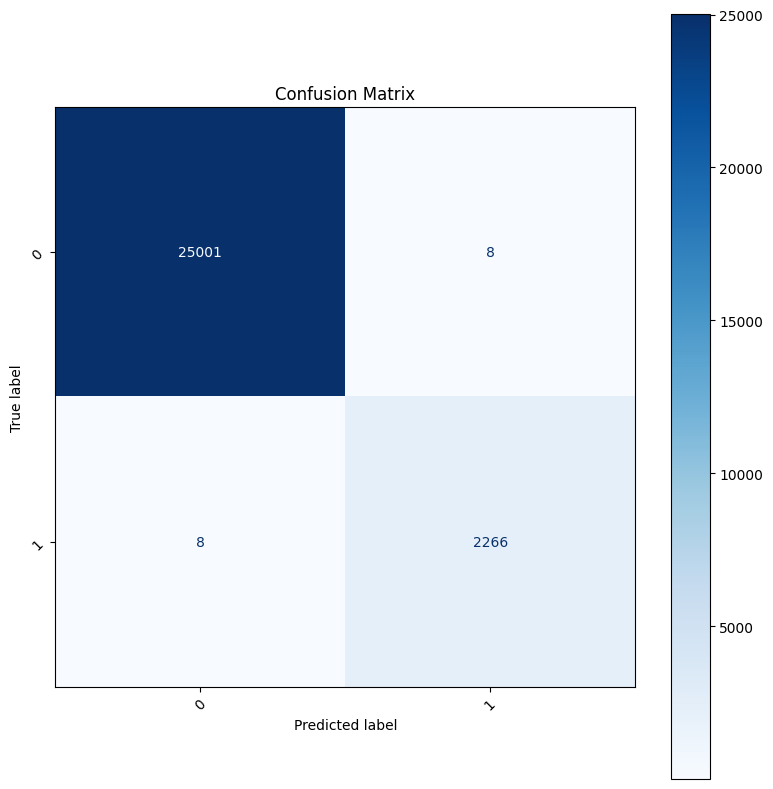

 83%|████████▎ | 5/6 [06:11<01:06, 66.04s/it]

XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       1.00      1.00      1.00      2274

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



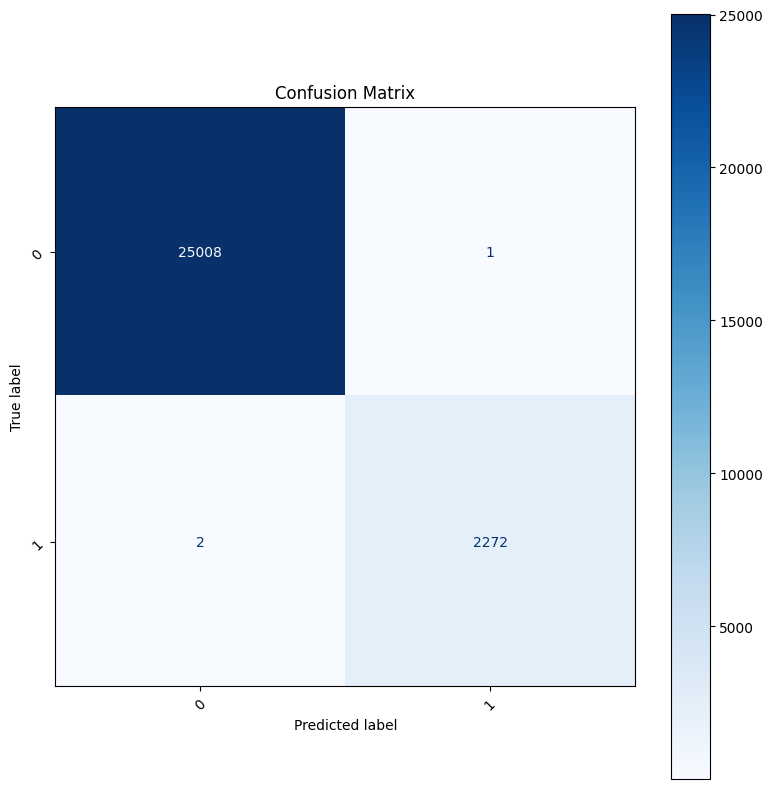

100%|██████████| 6/6 [06:15<00:00, 62.59s/it]


In [32]:
# Confusion matrix and accuracies
rs = 0

knn = KNeighborsClassifier()
log_reg = LogisticRegression(random_state=rs)
svm_classifier = svm.SVC(random_state=rs)
dt = DecisionTreeClassifier(random_state=rs)
ada_boost = AdaBoostClassifier(random_state=rs)
xgboost = xgb.XGBClassifier(objective="binary:logistic", random_state=rs)

models = [knn , log_reg , svm_classifier, dt, ada_boost, xgboost]
models_accuracies ={}

for model in tqdm(models):
  model.fit(trX, trY)
  models_accuracies[type(model).__name__] = model.score(teX, teY)
  print(type(model).__name__)

  predicted_labels = model.predict(teX)
  print(classification_report(teY, predicted_labels))

  # Calculate confusion matrix
  cm = confusion_matrix(teY, predicted_labels)

  classes = [0, 1]

  # Create confusion matrix display
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

  # Plot confusion matrix
  fig, ax = plt.subplots(figsize=(8, 8))
  disp.plot(ax=ax, cmap='Blues')  # You can choose your preferred colormap

  # Set additional properties if needed
  ax.set_title('Confusion Matrix')
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.tight_layout()

  plt.show()

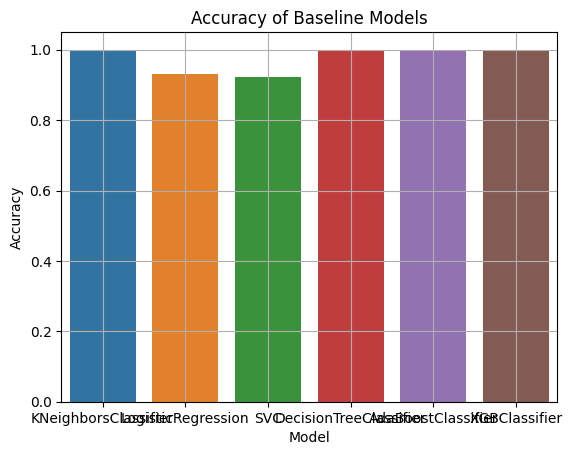

,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,AdaBoostClassifier,XGBClassifier
0,0.996628,0.93003,0.923542,0.999927,0.999414,0.99989


In [33]:
# barplot for baseline models
sns.barplot(x=[type(i).__name__ for i in models], y=[j for i,j in models_accuracies.items() if i in [type(i).__name__ for i in models]])
plt.title('Accuracy of Baseline Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
pd.DataFrame([models_accuracies])

## Bagging & Stacking

In [34]:
# Decision tree cross validation
# xgboost cross validation

estimators = [DecisionTreeClassifier(random_state=rs), xgb.XGBClassifier(objective="binary:logistic", random_state=rs)]
estimators = {estimator.__class__.__name__: estimator for estimator in estimators}

Bagging Weighted F1 Score


  0%|          | 0/2 [00:00<?, ?it/s]

BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       1.00      1.00      1.00      2274

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



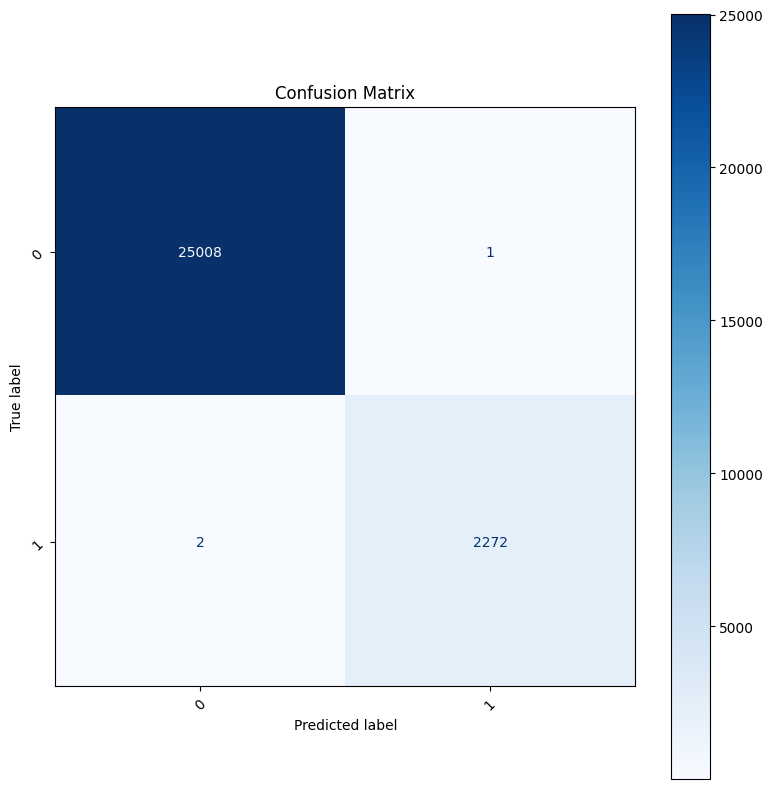

 50%|█████     | 1/2 [00:03<00:03,  3.13s/it]

BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       1.00      1.00      1.00      2274

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



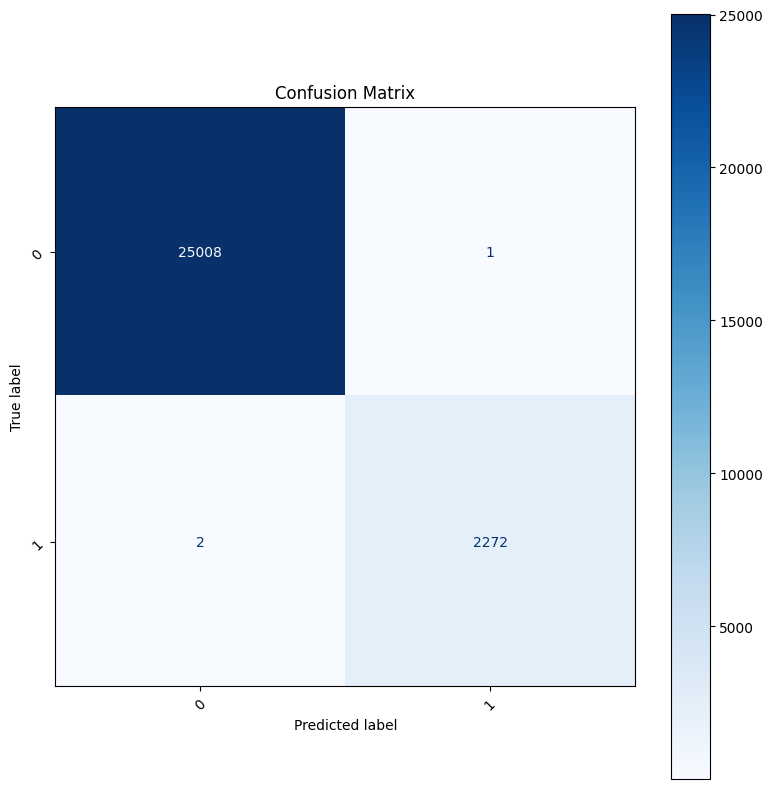

100%|██████████| 2/2 [01:12<00:00, 36.42s/it]


In [35]:
nEst = 20
print(f'Bagging Weighted F1 Score')
for estName, est in tqdm(estimators.items()):
  model = BaggingClassifier(clone(est), n_estimators=nEst, n_jobs=-1)
  model.fit(trX, trY)
  print(type(model).__name__)

  predicted_labels = model.predict(teX)
  print(classification_report(teY, predicted_labels))

  # Calculate confusion matrix
  cm = confusion_matrix(teY, predicted_labels)

  classes = [0, 1]

  # Create confusion matrix display
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

  # Plot confusion matrix
  fig, ax = plt.subplots(figsize=(8, 8))
  disp.plot(ax=ax, cmap='Blues')  # You can choose your preferred colormap

  # Set additional properties if needed
  ax.set_title('Confusion Matrix')
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.tight_layout()
  plt.show()

StackingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25009
           1       1.00      1.00      1.00      2274

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



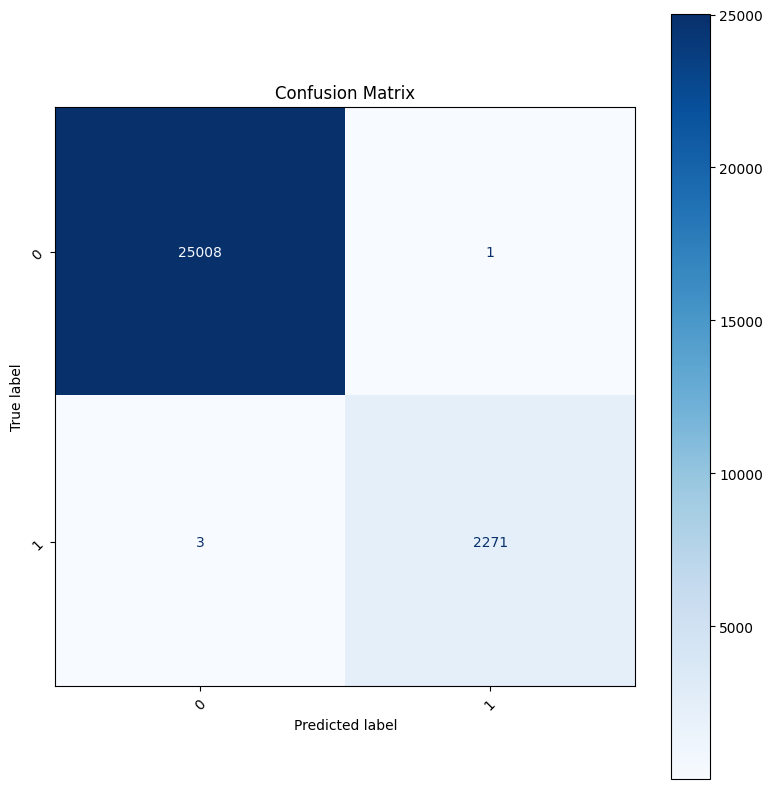

In [36]:
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], DecisionTreeClassifier(random_state=rs), n_jobs=-1)

stacking.fit(trX, trY)
models_accuracies[type(stacking).__name__] = stacking.score(teX, teY)
print(type(stacking).__name__)

predicted_labels = stacking.predict(teX)

print(classification_report(teY, predicted_labels))

# Calculate confusion matrix
cm = confusion_matrix(teY, predicted_labels)

classes = [0, 1]

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')  # You can choose your preferred colormap

# Set additional properties if needed
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## Champion Model - xgboost - Cross Validation

In [37]:
X = traindata.loc[:, traindata.columns != 'Label']
y = traindata.loc[:, traindata.columns == 'Label']

In [38]:
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=rs)
scores = cross_val_score(clf, X, y, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.04)


In [39]:
# Cross validation iterator

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=rs)
cross_val_score(clf, X, y, cv=cv)

array([0.99989004, 0.99996335, 0.99996335, 1.        , 1.        ])

# Prediction

In [40]:
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=rs)
clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [41]:
testdata.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,5967,5967,6,38928087,8,2,48.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.541304,0.256884,4.325343e+06,6.594416e+06,15371769.0,0.0,38928087.0,5.561155e+06,7.068528e+06,15371769.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,160,40,0.205507,0.051377,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,6.600000,6.0,6.0,160,0,0,0,0,0,0,8,48,2,12,5840,0,7,20,64.500000,89.802561,128.0,1.0,1.297599e+07,2.360014e+06,15371769.0,10653446.0,1
1,48161,46578,6,105,2,2,12.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,228571.428571,38095.238095,3.500000e+01,5.802586e+01,102.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,2.0,2.0,0.000000e+00,2.0,2.0,0,0,0,0,40,40,19047.619048,19047.619048,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,7.500000,6.0,6.0,40,0,0,0,0,0,0,2,12,2,12,5840,0,1,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
2,22804,22804,6,24368284,8,6,48.0,36.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.447104,0.574517,1.874483e+06,3.748817e+06,10832964.0,1.0,24368284.0,3.481183e+06,4.645704e+06,10833068.0,1.0,15962113.0,3192422.6,4.814161e+06,10833066.0,1.0,0,0,0,0,160,120,0.328296,0.246222,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,6.428571,6.0,6.0,160,0,0,0,0,0,0,8,48,6,36,5840,0,7,20,90.000000,25.119713,105.0,61.0,8.122671e+06,2.862532e+06,10832964.0,5128982.0,1
3,48162,43438,6,104,2,2,12.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,230769.230769,38461.538462,3.466667e+01,5.831238e+01,102.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,0.000000e+00,1.0,1.0,0,0,0,0,40,40,19230.769231,19230.769231,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,7.500000,6.0,6.0,40,0,0,0,0,0,0,2,12,2,12,5840,0,1,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
4,61803,61803,6,42848358,8,2,48.0,12.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.400287,0.233381,4.760929e+06,7.153841e+06,14853735.0,1.0,42848245.0,6.121178e+06,7.650009e+06,14853735.0,1.0,2.0,2.0,0.000000e+00,2.0,2.0,0,0,0,0,160,40,0.186705,0.046676,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,6.600000,6.0,6.0,160,0,0,0,0,0,0,8,48,2,12,5840,0,7,20,30.333333,25.403412,45.0,1.0,1.428272e+07,8.454236e+05,14853735.0,13311501.0,1


In [42]:
output = pd.DataFrame(clf.predict(testdata), columns=['Class'])
output.index.names = ['ID']
output.head()

,Class
ID,
0,0
1,0
2,0
3,0
4,0


In [43]:
output.to_csv('submission.csv', index=True)

# Hyperparameter Tuning

In [44]:
# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
clf = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X, y), verbose=3, random_state=rs)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[05:35:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035139432/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:35:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035139432/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:35:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035139432/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:35:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035139432/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/3] END colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8;, score=1.000 total time= 1.4min
[05:37:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035139432/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 3/3] END colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weig

In [45]:
clf = xgb.XGBClassifier(
    subsample=0.8,
    min_child_weight=5,
    max_depth=5,
    gamma=2,
    colsample_bytree=0.8
)

clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
output = pd.DataFrame(clf.predict(testdata), columns=['Class'])
output.index.names = ['ID']
output.head()

,Class
ID,
0,0
1,0
2,0
3,0
4,0


In [47]:
output.to_csv('submission.csv', index=True)